In [489]:
# You may use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [348]:
# KNN
dataset = pd.read_csv(r'C:/Users/sohail/Desktop/Data_Science/Iris.csv')
dataset

X = dataset[['Sepal_length','Sepal_width','Petal_width']]
X = X.values

Y = dataset['Species']
Y = Y.values

#result = []
max_accuracy = 0
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    #CV = KFold(n_splits=5,random_state=1,shuffle=True)
    accuracy = cross_val_score(knn, X, Y, cv=5)
    accuracy = np.mean(accuracy)
    #result.append(accuracy)
    if max_accuracy < accuracy:
        max_accuracy = accuracy
        K_of_max_accuracy = i

print("We are having max accuracy of "+ str(max_accuracy) +" when number of nearest neighbors = "+str(K_of_max_accuracy))
#print(result)






We are having max accuracy of 0.9533333333333334 when number of nearest neighbors = 1


In [459]:
#DecisionTree

def classification_report_with_accuracy_score(y_true, y_pred):
    #print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score



Entropy = DecisionTreeClassifier( criterion='entropy', ccp_alpha = 0.014 )
Accuracy = cross_val_score(Entropy, X, Y, scoring=make_scorer(classification_report_with_accuracy_score), cv=10)
print("Accuracy = ", np.mean(Accuracy))




Accuracy =  0.9600000000000002


C:\Users\sohail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\sohail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\sohail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\sohail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\sohail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: Futu

Text(0, 0.5, 'Inertia')

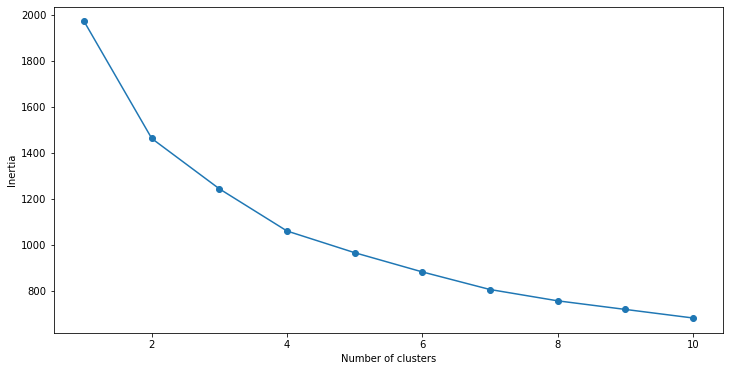

In [465]:
#Kmeans
dataset = pd.read_csv(r'C:/Users/sohail/Desktop/Data_Science/diabetes.csv')
dataset

X = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI']]
X = X.values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')



In [468]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)


#frame = pd.DataFrame(data_scaled)
#frame['cluster'] = pred
#frame['cluster'].value_counts()

C:\Users\sohail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


1    168
0     91
3     75
2     60
Name: cluster, dtype: int64

In [485]:
#Linear Regression

X = dataset[['Glucose']]
Y = dataset[['BloodPressure']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.3, random_state=1)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))



11.520285262223645
